In [1]:
import pandas as pd

# Load datasets
stock_prices = pd.read_csv('stock_prices.csv')
sentiment_data = pd.read_csv('final_sentiment_data.csv')

# Convert date columns to datetime format
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'], errors='coerce')
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'], errors='coerce')

# Drop rows with missing dates (if any)
stock_prices.dropna(subset=['Date'], inplace=True)
sentiment_data.dropna(subset=['Date'], inplace=True)

# Merge datasets based on 'Tickers' 'Date' and 'Company Name' columns
merged_data = pd.merge(sentiment_data, stock_prices, on=['Ticker', 'Company', 'Date'], how='inner')

# Remove duplicates based on specific columns
merged_data = merged_data.drop_duplicates(subset=['Ticker', 'Company', 'Date'], keep='first')

merged_data

,Date,Time,Headlines,Description,Company,Ticker,headlines_polarity,description_polarity,Final_sentiment,Open,Close,Adj Close
0,2023-11-07,19:52:00,Cramer's Lightning Round: Cisco is a buy,"""Mad Money"" host Jim Cramer rings the lightnin...",Cisco,CSCO,-0.200000,-0.412500,1,53.340000,53.130001,53.130001
1,2023-06-15,19:33:00,Cramer's Lightning Round: Microsoft is a winner,"""Mad Money"" host Jim Cramer rings the lightnin...",Microsoft,MSFT,-0.200000,-0.412500,1,337.480011,348.100006,347.364563
2,2023-06-12,20:31:00,Cramer's Lightning Round: Teradyne is a buy,"""Mad Money"" host Jim Cramer rings the lightnin...",Teradyne,TER,-0.200000,-0.412500,1,106.410004,109.459999,109.347862
3,2023-01-20,19:37:00,Cramer's lightning round: I like Juniper Networks,"""Mad Money"" host Jim Cramer rings the lightnin...",Juniper Networks,JNPR,-0.200000,-0.412500,1,31.360001,31.459999,30.772791
4,2022-12-15,19:39:00,Cramer's lightning round: You can pick up some...,"""Mad Money"" host Jim Cramer rings the lightnin...",IBM,IBM,-0.200000,-0.412500,1,148.520004,142.360001,135.624207
...,...,...,...,...,...,...,...,...,...,...,...,...
259,2016-04-15,18:36:00,Cramer's tax day showdown: Intuit vs. H&R Block,Jim Cramer compares the two largest tax titans...,Intuit,INTU,0.000000,0.000000,1,103.169998,102.830002,96.846909
260,2016-04-11,19:34:00,Cramer: The secret to Accenture's sauce,Jim Cramer always says never own a stock if yo...,Accenture,ACN,-0.400000,0.216667,1,112.940002,113.099998,99.519905
261,2016-02-25,13:16:00,"Lightning Round: Krispy Kreme, Citigroup & Qorvo",Jim Cramer rattles off his take on caller favo...,Qorvo,QRVO,-0.200000,0.392857,1,42.310001,42.669998,42.669998
262,2016-02-18,19:14:00,Cramer: IBM valued higher than Apple—Insanity!,Jim Cramer was shocked when IBM rallied on Thu...,IBM,IBM,0.312500,-0.054762,2,124.282982,126.625237,88.923660


In [2]:
# Save merged data to a new CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from prophet import Prophet


# Load data
df = pd.read_csv('merged_data.csv')

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y', 'Final_sentiment': 'sentiment'})
df = df[['ds', 'y', 'sentiment', 'Open']]

# Train/test split
train, test = train_test_split(df, test_size=0.2, shuffle=False)


For time series forecasting, I chose ARIMA first to analyse the MAPE score.The MAPE score provides a quantitative measure of the model's accuracy on the test set which will be calculated at the end to see the perfection. 

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\anaconda3\lib\site-packages\statsmode

MAPE Score (ARIMA): 44.75576558770138
RMSE (ARIMA): 48.86276901073796
Forecast Bias (ARIMA): 36.310586738510516


<Figure size 1200x600 with 0 Axes>

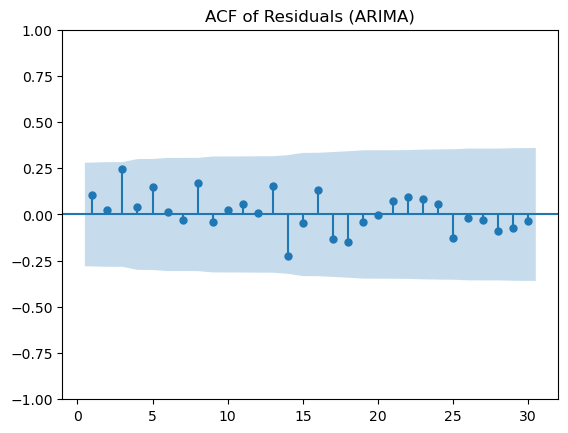

Enter the Opening price of company stock: 45
Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): 2
Predicted Close Value (ARIMA) for User Input: 44.633935682962075


In [4]:

# Specify the grid of parameters for ARIMA
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

best_mape = float('inf')
best_params = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)

            # Initialize and fit ARIMA model on the training set
            model = ARIMA(train['y'], order=order)
            fit_model = model.fit()

            # Make predictions on the test set
            y_pred = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

            # Calculate MAPE on the test set
            mape = mean_absolute_error(test['y'], y_pred) / np.mean(np.abs(test['y'])) * 100

            # Update best parameters if the current configuration has a lower MAPE
            if mape < best_mape:
                best_mape = mape
                best_params = order

print('MAPE Score (ARIMA):', best_mape)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(test['y'], y_pred))
print('RMSE (ARIMA):', rmse)

# Calculate Forecast Bias on the test set
bias = np.mean(test['y'] - y_pred)
print('Forecast Bias (ARIMA):', bias)

# Calculate residuals on the test set
residuals_arima = test['y'] - y_pred

# Plot Autocorrelation Function (ACF) of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_arima, lags=30, zero=False, title='ACF of Residuals (ARIMA)')
plt.show()

# User input
user_open_price = float(input("Enter the Opening price of company stock: "))
user_sentiment = int(input("Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): "))

# Create a DataFrame with user input
user_data_arima = pd.DataFrame({
    'Open': [user_open_price],
    'sentiment': [user_sentiment]
})
# Initialize and fit ARIMA model with the best parameters on the training set
best_order = best_params
model_arima = ARIMA(train['y'], order=best_order, exog=train[['Open', 'sentiment']])
fit_model_arima = model_arima.fit()

# Make predictions for the user input
future_user_arima = fit_model_arima.get_forecast(steps=1, exog=user_data_arima)
predicted_close_arima = future_user_arima.predicted_mean.values[0]

print(f'Predicted Close Value (ARIMA) for User Input: {predicted_close_arima}')


The MAPE score is not so good and also the prediction is not very accurate. 

XGBoost, an implementation of gradient-boosted decision trees, is a powerful algorithm that can be used for time series forecasting. Now following is the implementation og XGBoost

MAPE Score (XGBoost): 12.671515052179473
RMSE (XGBoost): 12.760202898681829
Forecast Bias (XGBoost): -3.807434277337249


<Figure size 1200x600 with 0 Axes>

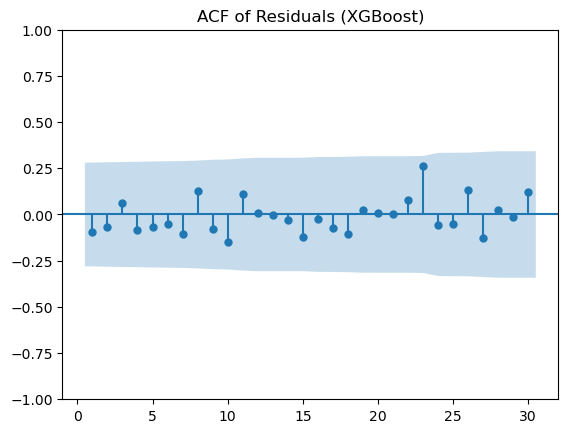

Enter the Opening price of the company stock: 454
Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): 1
Predicted Close Value (XGBoost) for User Input: 556.8045841329239


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [5]:
# Feature scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['y', 'sentiment', 'Open']])
test_scaled = scaler.transform(test[['y', 'sentiment', 'Open']])

# Define XGBoost model
model_xgboost = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model on the training set
model_xgboost.fit(train_scaled[:, 1:], train_scaled[:, 0])

# Make predictions on the test set
y_pred_xgboost = model_xgboost.predict(test_scaled[:, 1:])

# Inverse transform the predictions
y_pred_xgboost = scaler.inverse_transform(np.column_stack((y_pred_xgboost, test_scaled[:, 1:])))

# Calculate MAPE on the test set
mape_xgboost = mean_absolute_error(test['y'], y_pred_xgboost[:, 0]) / np.mean(np.abs(test['y'])) * 100

print('MAPE Score (XGBoost):', mape_xgboost)

# Calculate RMSE on the test set
rmse_xgboost = np.sqrt(mean_squared_error(test['y'], y_pred_xgboost[:, 0]))
print('RMSE (XGBoost):', rmse_xgboost)

# Calculate Forecast Bias on the test set
bias_xgboost = np.mean(test['y'] - y_pred_xgboost[:, 0])
print('Forecast Bias (XGBoost):', bias_xgboost)

# Calculate residuals on the test set
residuals_xgboost = test['y'] - y_pred_xgboost[:, 0]

# Plot Autocorrelation Function (ACF) of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals_xgboost, lags=30, zero=False, title='ACF of Residuals (XGBoost)')
plt.show()

# User input
user_open_price = float(input("Enter the Opening price of the company stock: "))
user_sentiment = int(input("Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): "))

# Create a DataFrame with user input
user_data_xgboost = pd.DataFrame({
    'Open': [user_open_price],
    'sentiment': [user_sentiment],
    'y': [np.nan]  # Placeholder for the target variable
})

# Feature scaling for user input
user_data_scaled = scaler.transform(user_data_xgboost[['sentiment', 'Open', 'y']])

# Make predictions for the user input
predicted_close_xgboost = model_xgboost.predict(user_data_scaled[:, 1:])

# Inverse transform the user input prediction
predicted_close_xgboost = scaler.inverse_transform(np.column_stack((predicted_close_xgboost, user_data_scaled[:, 1:])))

print(f'Predicted Close Value (XGBoost) for User Input: {predicted_close_xgboost[0, 0]}')


The MAPE and other parameters were good as compared to ARIMA but the prediction was not at all reliable. Because of the drawbacks of ARIMA and XGBoost, I now chose Prophet library. It includes sentiment and opening price as regressors and seems appropriate for the context of predicting stock prices. 

16:24:05 - cmdstanpy - INFO - Chain [1] start processing
16:24:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE score (Prophet): 54.25313573693489
RMSE (Prophet): 26.261335472811368
Forecast Bias (Prophet): -17.326654476276424


<Figure size 1200x600 with 0 Axes>

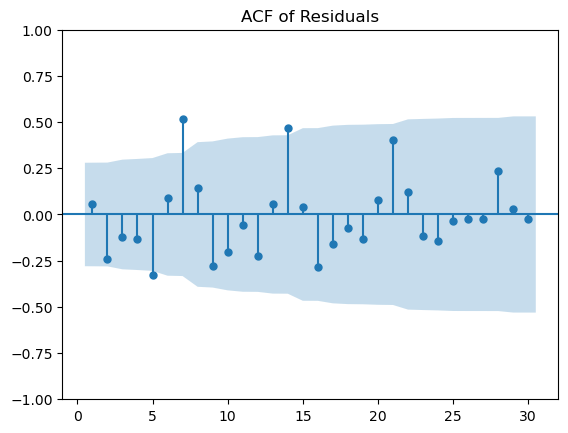

In [6]:
# Train model
model = Prophet(seasonality_mode='multiplicative')
model.add_regressor('sentiment')
model.add_regressor('Open')
model.fit(train)

# Make predictions
future = model.make_future_dataframe(periods=len(test), include_history=False)
future['sentiment'] = test['sentiment'].values
future['Open'] = test['Open'].values
forecast = model.predict(future)

# Evaluate MAPE
y_true = test['y'].values
y_pred_prophet1 = forecast['yhat'].values
mape = np.mean(np.abs(y_true - y_pred_prophet1) / y_true) * 100
print('MAPE score (Prophet):', mape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet1))
print('RMSE (Prophet):', rmse)

# Calculate Forecast Bias
bias = np.mean(y_true - y_pred_prophet1)
print('Forecast Bias (Prophet):', bias)

# Calculate and plot ACF of Residuals
residuals_prophet1 = y_true - y_pred_prophet1

plt.figure(figsize=(12, 6))
plot_acf(residuals_prophet1, lags=30, zero=False, title='ACF of Residuals')
plt.show()

A lower MAPE value indicates better accuracy, so a MAPE of 54.25% suggests that there is room for improvement in the model's predictive performance. 

In [7]:
# Hyperparameter tuning
model = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.05)
model.add_regressor('sentiment')
model.add_regressor('Open')
model.fit(train)

16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Feature engineering
train['log_y'] = np.log1p(train['y'])
model = Prophet(seasonality_mode='multiplicative')
model.add_regressor('sentiment')
model.add_regressor('Open')
model.fit(train)

16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing


Finally, grid search over a range of hyperparameters to find the combination that minimizes the MAPE.

16:24:07 - cmdstanpy - INFO - Chain [1] start processing
16:24:07 - cmdstanpy - INFO - Chain [1] done processing


MAPE score (Prophet after tuning): 14.423780029735747
RMSE (Prophet after tuning): 13.712881075566552
Forecast Bias (Prophet after tuning): -4.943638331266232


<Figure size 1200x600 with 0 Axes>

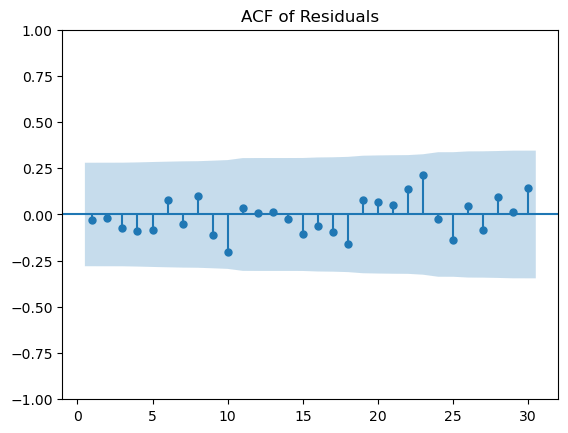

In [9]:
# Best parameters from tuning
best_params = {'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1}

# Train the model with the best parameters
model_prophet = Prophet(seasonality_mode='multiplicative', **best_params)
model_prophet.add_regressor('sentiment')
model_prophet.add_regressor('Open')
model_prophet.fit(train)

# Make predictions on the test set
future = model_prophet.make_future_dataframe(periods=len(test), include_history=False)
future['sentiment'] = test['sentiment'].values
future['Open'] = test['Open'].values
forecast = model_prophet.predict(future)

# Evaluate MAPE
y_true = test['y'].values
y_pred_prophet2 = forecast['yhat'].values
mape = np.mean(np.abs(y_true - y_pred_prophet2) / y_true) * 100
print('MAPE score (Prophet after tuning):', mape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred_prophet2))
print('RMSE (Prophet after tuning):', rmse)

# Calculate Forecast Bias
bias = np.mean(y_true - y_pred_prophet2)
print('Forecast Bias (Prophet after tuning):', bias)

# Calculate and plot ACF of Residuals
residuals_prophet2 = y_true - y_pred_prophet2

plt.figure(figsize=(12, 6))
plot_acf(residuals_prophet2, lags=30, zero=False, title='ACF of Residuals')
plt.show()

In [10]:
user_open_price = float(input("Enter the Opening price of company stock: "))
user_sentiment = int(input("Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): "))

# Create a DataFrame with user input
user_data = pd.DataFrame({
    'ds': [pd.to_datetime('today')],
    'Open': [user_open_price],
    'sentiment': [user_sentiment]
})

# Initialize and fit the model with the best parameters
best_params = {'seasonality_prior_scale': 0.1, 'changepoint_prior_scale': 0.1}
model = Prophet(seasonality_mode='multiplicative', **best_params)
model.add_regressor('sentiment')
model.add_regressor('Open')
model.fit(train)

# Make predictions for the user input
future_user = model.make_future_dataframe(periods=1, include_history=False)
future_user['Open'] = user_data['Open'].values
future_user['sentiment'] = user_data['sentiment'].values

forecast_user = model.predict(future_user)

# Display the predicted close value
predicted_close = forecast_user['yhat'].values[0]
print(f'Predicted Close Value (Prophet after tuning): {predicted_close}')

Enter the Opening price of company stock: 657
Enter the sentiment (0 - Negative, 1 - Neutral, 2 - Positive): 0


16:24:14 - cmdstanpy - INFO - Chain [1] start processing
16:24:14 - cmdstanpy - INFO - Chain [1] done processing


Predicted Close Value (Prophet after tuning): 654.5807909255458


Now this is very accurate. The price does descrease for negative sentiment but not so much. The parameter values are also the best out of all.

# Visual representation of results

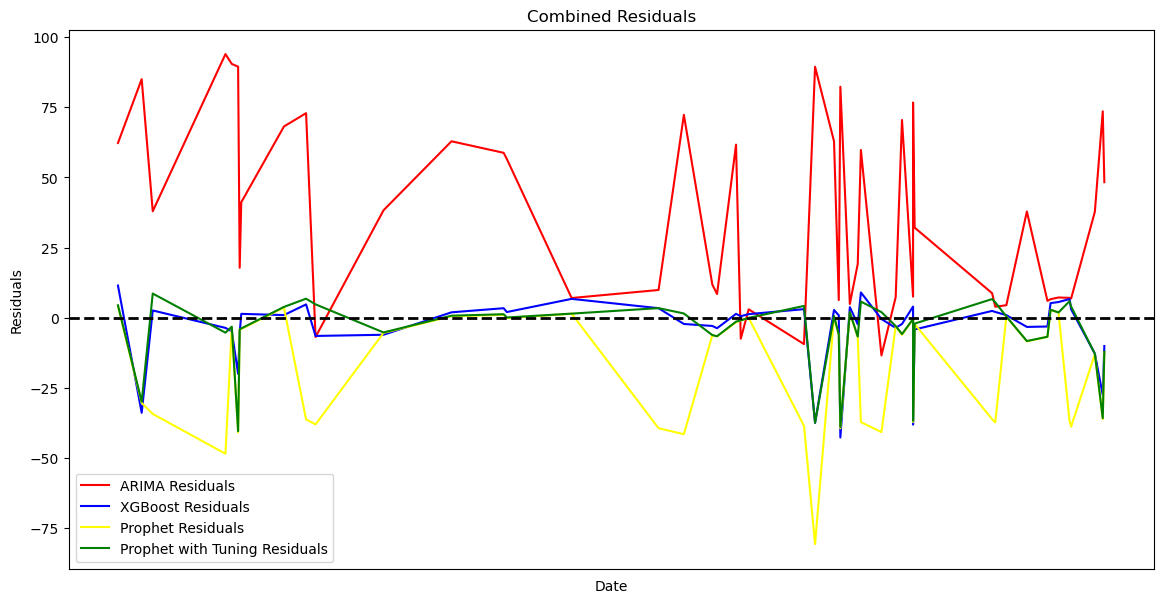

In [11]:
import matplotlib.pyplot as plt

# Set up a figure and axis for the combined plot
plt.figure(figsize=(14, 7))

# Plotting Residuals for ARIMA
plt.plot(test['ds'], residuals_arima, label='ARIMA Residuals', color='red')

# Plotting Residuals for XGBoost
plt.plot(test['ds'], residuals_xgboost, label='XGBoost Residuals', color='blue')

# Plotting Residuals for Prophet without tuning
plt.plot(test['ds'], residuals_prophet1, label='Prophet Residuals', color='yellow')

# Plotting Residuals for Prophet with tuning
plt.plot(test['ds'], residuals_prophet2, label='Prophet with Tuning Residuals', color='green')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=2)

# Set titles, labels, and legend
plt.title('Combined Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()


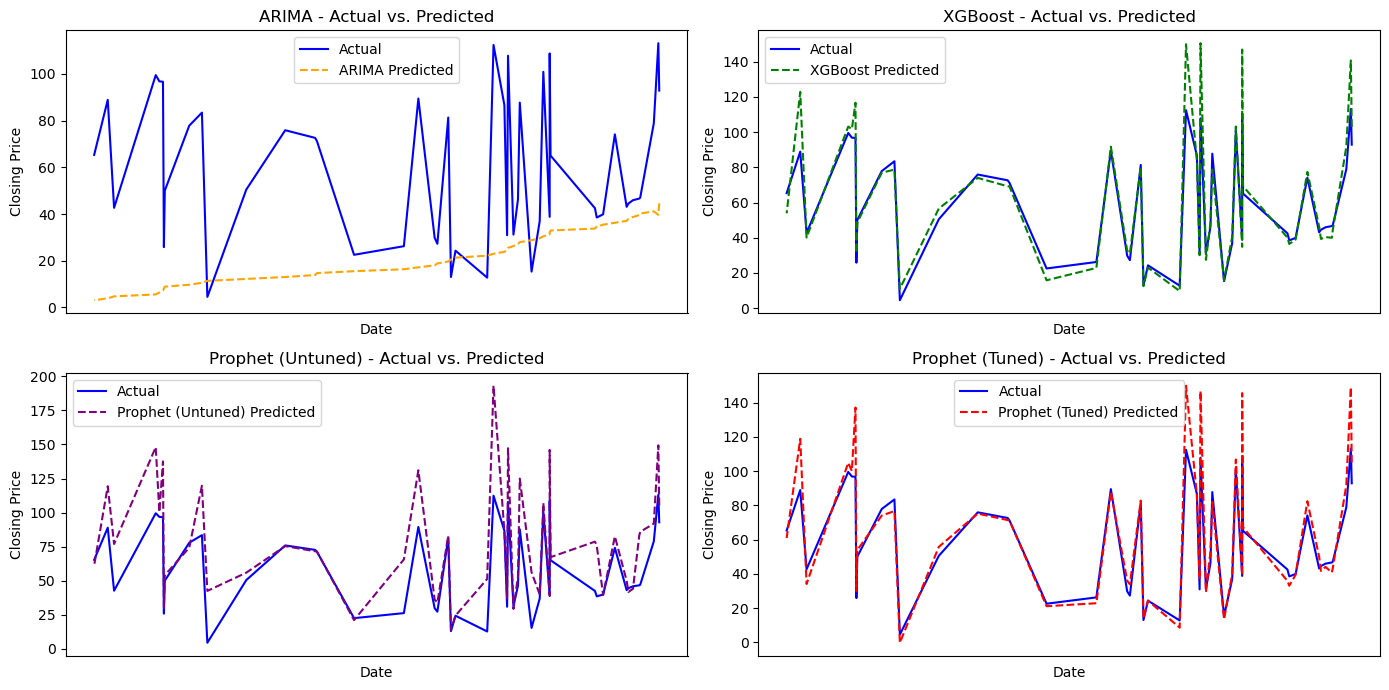

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure and axis
plt.figure(figsize=(14, 7))

# Plot actual vs. predicted values for ARIMA
plt.subplot(2, 2, 1)
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], y_pred, label='ARIMA Predicted', linestyle='--', color='orange')
plt.title('ARIMA - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks([])
plt.legend()

# Plot actual vs. predicted values for XGBoost
plt.subplot(2, 2, 2)
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], y_pred_xgboost[:, 0], label='XGBoost Predicted', linestyle='--', color='green')
plt.title('XGBoost - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks([])
plt.legend()

# Plot actual vs. predicted values for Prophet (Untuned)
plt.subplot(2, 2, 3)
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], y_pred_prophet1, label='Prophet (Untuned) Predicted', linestyle='--', color='purple')
plt.title('Prophet (Untuned) - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks([])
plt.legend()

# Plot actual vs. predicted values for Prophet (Tuned)
plt.subplot(2, 2, 4)
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], y_pred_prophet2, label='Prophet (Tuned) Predicted', linestyle='--', color='red')
plt.title('Prophet (Tuned) - Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks([])
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
